# 다항 회귀 분석 (Polynomial Regression Analysis)
- 피쳐(독립변수)들과 레이블(종속변수)이 `2차 함수 이상의 관계`를 가지는 것으로 `곡선이나 좀 더 복잡한 모양을 표현`하는 것이 가능

### 피쳐(독립변수)들의 차수를 높이는 형태
- 다항회귀 역시 선형회귀로 간주 되는데 선형회귀의 정의가 단순히 직선이나 곡선과 같은 모양에 있는 것이 아니라 가중치와 피쳐들의 선형 결합에 있기 때문
- 다항회귀는 별도의 알고리즘이 있는 것이 아니라 `피쳐들의 제곱`, `서로 곱한 값` 등 `좀 더 복잡한 값으로 만들어` 선형회귀에 넣어서 학습시킴
- Scikit-learn에서는 PolynomialFeatures 클래스로 원본 단항 Feature들을 다항 Feature들로 변환한 데이터 세트에 LinearRegression 객체를 적용하는 것으로 다항 회귀 기능을 제공한다

## 1. 작업 준비
### 패키지 가져오기 및 그래프 전역 설정

In [2]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## 2. 자동차의 속도(speed)에 따른 제동거리 (dist) 예측
### 1) 데이터 가져오기
- 총 50개의 데이터

In [5]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### 2) 데이터 전처리 (훈련 데이터, 검증 데이터 분할)
#### 0차항(1)을 포함하는 2차식으로 변환
- PolynomialFeatures 클래스를 사용하여 y = ax + b 라는 회귀식을 y = ax^2 + bx + c 형태로 바꾼다.
    - degree: 변환할 차수 (기본값 = 2)
    - include_bias: True인 경우 0차항(1)도 함께 생성한다 (기본값 = True)

In [12]:
my_poly = PolynomialFeatures(degree = 2, include_bias = True)
my_poly
my_fit = my_poly.fit_transform(origin[['speed']])
print(len(my_fit))
my_fit

50


array([[  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  19., 361.],
 

#### 생성된 피쳐의 이름 확인

In [13]:
my_poly.get_feature_names_out()

array(['1', 'speed', 'speed^2'], dtype=object)

#### 0차항(1)을 포함하지 않는 2차식으로 변환(권장)

In [14]:
my_poly = PolynomialFeatures(include_bias = False)
my_fit = my_poly.fit_transform(origin[['speed']])
my_fit

array([[  4.,  16.],
       [  4.,  16.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 15., 225.],
       [ 15., 225.],
       [ 15., 225.],
       [ 16., 256.],
       [ 16., 256.],
       [ 17., 289.],
       [ 17., 289.],
       [ 17., 289.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 19., 361.],
       [ 19., 361.],
       [ 19., 361.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 24., 576.],
       [ 24.,

#### 생성된 피쳐의 이름 확인

In [15]:
my_poly.get_feature_names_out()

array(['speed', 'speed^2'], dtype=object)

#### 데이터프레임으로 재구성

In [16]:
x = DataFrame(my_fit, columns = my_poly.get_feature_names_out())
x.head()

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


#### 종속변수만 추출한 데이터프레임

In [17]:
y = origin[['dist']]
y.head()

,dist
0,2
1,10
2,4
3,22
4,16


#### 훈련 데이터와 검증 데이터로 분리

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 2), (15, 2), (35, 1), (15, 1))

In [20]:
print(len(x_train))
x_train.head()

35


,speed,speed^2
1,4.0,16.0
6,10.0,100.0
27,16.0,256.0
49,25.0,625.0
24,15.0,225.0


In [21]:
print(len(x_test))
x_test.head()

15


,speed,speed^2
10,11.0,121.0
13,12.0,144.0
30,17.0,289.0
46,24.0,576.0
18,13.0,169.0


In [22]:
print(len(y_train))
y_train.head()

35


,dist
1,10
6,18
27,40
49,85
24,26


In [23]:
print(len(y_test))
y_test.head()

15


,dist
10,28
13,24
30,50
46,92
18,46


### 3) 회귀분석 수행
- 데이터 표본수(`35`)가 작기 떄문에 `과적합이 발생`하지만 예제 데이터셋이므로 과적합은 무시하고 진행하도록 한다

In [24]:
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)
print('계수: ', my_fit.coef_)
print('절편: ', my_fit.intercept_)
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

계수:  [[0.73773403 0.09986278]]
절편:  [4.70067321]
훈련 데이터 설명력:  0.5941347702404498
검증 데이터 설명력:  0.8183504037854948


### 4) 회귀식 추정

In [27]:
feature_names = x.columns
# print(feature_names)

expr = []
for i, v in enumerate(feature_names):
    expr.append('%f x %s' % (my_fit.coef_[0][i], v))

expr = ' + '.join(expr)
expr = 'y = ' + expr + ' + %f' % my_fit.intercept_[0]
expr

'y = 0.737734 x speed + 0.099863 x speed^2 + 4.700673'

### 5) 예측값 생성
#### 훈련 데이터에 대한 예측값

In [31]:
y_train_pred = my_fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1) # 리스트 안에 있는 것을 밖으로 꺼내줌
y_train_pred

array([ 9.24941376, 22.06429118, 42.06928848, 85.55825922, 38.23580838,
       50.33542533, 31.16802484, 54.76808209, 42.06928848, 22.06429118,
       34.60205383, 79.92724915, 14.75808748, 38.23580838, 74.49596463,
       16.99376316, 31.16802484, 54.76808209, 27.9337214 , 69.26440567,
       38.23580838, 54.76808209, 59.40046439, 24.89914351, 50.33542533,
       50.33542533, 34.60205383, 59.40046439, 34.60205383, 31.16802484,
       59.40046439, 50.33542533, 46.10249413, 14.75808748, 79.92724915])

#### 검증 데이터에 대한 예측값

In [33]:
y_test_pred = my_fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1) # 리스트 안에 있는 것을 밖으로 꺼내줌
y_test_pred

array([24.89914351, 27.9337214 , 46.10249413, 79.92724915, 31.16802484,
        9.24941376, 59.40046439, 27.9337214 , 46.10249413, 22.06429118,
       34.60205383, 79.92724915, 27.9337214 , 59.40046439, 19.42916439])

### 6) 학습 결과 시각화

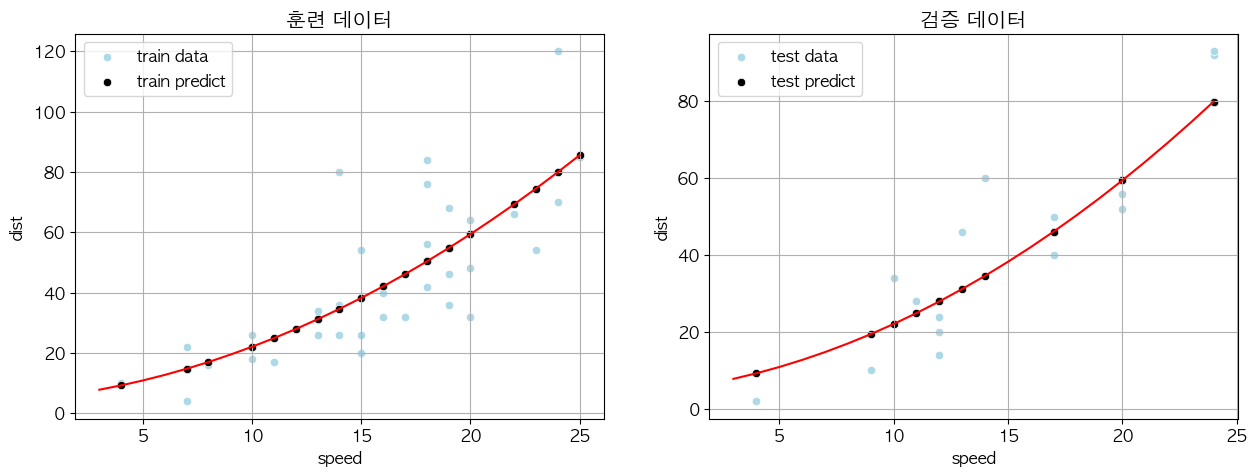

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['speed'],
               y=y_train['dist'],
               label='train data',
               color = 'lightblue',
               ax = ax1)
sb.scatterplot(x=x_train['speed'],
               y=y_train_pred,
               label='train predict',
               color = 'black',
               ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치 계산
y_pred = xrange * my_fit.coef_[0][0] + xrange**2 * my_fit.coef_[0][1] + my_fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange,
           y=y_pred,
           color= 'red',
           ax = ax1)

ax1.set_title('훈련 데이터')
ax1.legend()
ax1.grid()

# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['speed'],
               y=y_test['dist'],
               label='test data',
               color = 'lightblue',
               ax = ax2)
sb.scatterplot(x=x_test['speed'],
               y=y_test_pred,
               label='test predict',
               color = 'black',
               ax = ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치 계산
y_pred = xrange * my_fit.coef_[0][0] + xrange**2 * my_fit.coef_[0][1] + my_fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange,
            y=y_pred,
            color='red',
            ax=ax2)
ax2.set_title('검증 데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

## 3. `농어의 크기`에 따른 `무게 예측`
### 1) 데이터 가져오기

In [47]:
origin = read_excel('https://data.hossam.kr/F02/fish2.xlsx')
print(len(origin))
origin.head()

56


,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


### 2) 데이터 전처리 (훈련데이터, 검증데이터 분할)
#### 다항식으로 변환하기

In [51]:
my_poly = PolynomialFeatures(degree = 2,
                             include_bias = False)
my_fit = my_poly.fit_transform(origin[['길이', '높이', '두께']])
x = DataFrame(my_fit, columns=my_poly.get_feature_names_out())
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


#### 모듈 기능을 활용한 다항식 변환

In [52]:
x = helper.convertPoly(origin[['길이', '높이', '두께']])
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


#### 훈련 데이터와 검증 데이터로 분리

In [53]:
x_train, x_test, y_train, y_test =  train_test_split(x, origin[['무게']], 
                                                     test_size = 0.3,
                                                     random_state = 123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 9), (17, 9), (39, 1), (17, 1))

In [54]:
print(len(x_train))
x_train.head()

39


,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
12,21.0,5.69,3.67,441.00,119.490,77.070,32.3761,20.8823,13.4689
47,40.0,11.93,7.11,1600.00,477.200,284.400,142.3249,84.8223,50.5521
30,27.3,8.32,5.14,745.29,227.136,140.322,69.2224,42.7648,26.4196
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
6,18.7,5.20,3.12,349.69,97.240,58.344,27.0400,16.2240,9.7344


In [55]:
print(len(x_test))
x_test.head()

17


,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
18,22.0,5.52,4.00,484.00,121.440,88.000,30.4704,22.0800,16.0000
13,21.3,6.38,3.53,453.69,135.894,75.189,40.7044,22.5214,12.4609
50,40.0,11.14,6.63,1600.00,445.600,265.200,124.0996,73.8582,43.9569
26,24.6,6.73,4.17,605.16,165.558,102.582,45.2929,28.0641,17.3889
41,36.0,10.61,6.74,1296.00,381.960,242.640,112.5721,71.5114,45.4276


In [56]:
print(len(y_train))
y_train.head()

39


,무게
12,125.0
47,850.0
30,300.0
1,32.0
6,78.0


In [57]:
print(len(y_test))
y_test.head()

17


,무게
18,110.0
13,130.0
50,820.0
26,188.0
41,700.0


### 3) 회귀 분석 수행

In [59]:
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)

print('계수: ', my_fit.coef_)
print('절편: ', my_fit.intercept_)
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

계수:  [[  37.41440758 -122.88132493  -97.18063962   -6.02888567    6.3426341
    55.66996142   49.79134062 -170.93573464   -6.00162745]]
절편:  [47.16932806]
훈련 데이터 설명력:  0.9902576456970869
검증 데이터 설명력:  0.9004397794100211


### 4) 회귀식 추정

In [60]:
feature_names = x.columns

expr = []
for i, v in enumerate(feature_names):
    expr.append(f"{round(my_fit.coef_[0][i], 2)} * {v}")

expr = ' + '.join(expr)
expr = f"y = {expr} + {round(my_fit.intercept_[0], 2)}"
expr

'y = 37.41 * 길이 + -122.88 * 높이 + -97.18 * 두께 + -6.03 * 길이^2 + 6.34 * 길이 높이 + 55.67 * 길이 두께 + 49.79 * 높이^2 + -170.94 * 높이 두께 + -6.0 * 두께^2 + 47.17'

### 5) 예측값 생성
#### 훈련 데이터에 대한 예측값

In [61]:
y_train_pred = my_fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1) # 리스트 안에 있는 것들을 밖으로 끄집어냄
y_train_pred

array([ 128.33370832,  883.83256839,  283.87720565,   21.77799523,
         75.83145366,  216.99327745,  938.39657569,  836.74358002,
        236.24624195, 1059.06921078,  222.57260812,  131.1820701 ,
        520.06151948,  879.22572679,   85.49063898,  169.39734992,
       1091.11155683,   38.96295379,   67.97550628,  131.18728322,
        869.36496752,  301.47510957,  126.61679479,  914.5832725 ,
        165.44141159,  671.60388692, 1044.70953338,   52.54927901,
        234.12069536,  270.70141026,  172.25433459,  691.90023498,
        140.65938096,  128.43625012,  587.73188249,  259.38435621,
        223.86802028,   43.34167721,  704.4884716 ])

#### 검증 데이터에 대한 예측값

In [62]:
y_test_pred = my_fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([ 201.35925469,  131.74411912,  764.54132634,  201.37347997,
        660.89831696,  141.00557179, 1019.15355072,  285.76056495,
        438.67935317,  141.57027174,  688.68240944,  112.87613858,
         12.7130393 ,   54.17763473,  122.18773841,  153.76869217,
         82.44640206])

### 6) 학습 결과 시각화

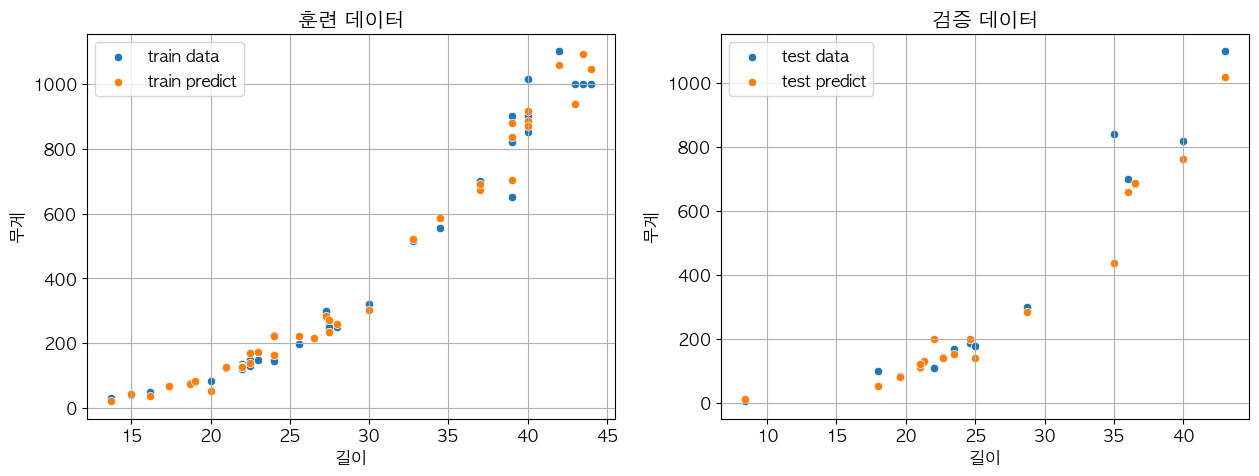

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

sb.scatterplot(x=x_train['길이'],
               y=y_train['무게'],
               label='train data',
               ax=ax1)
sb.scatterplot(x=x_train['길이'],
               y=y_train_pred,
               label='train predict',
               ax=ax1)
ax1.set_title('훈련 데이터')
ax1.legend()
ax1.grid()

sb.scatterplot(x=x_test['길이'],
               y=y_test['무게'],
               label='test data',
               ax=ax2)
sb.scatterplot(x=x_test['길이'],
               y=y_test_pred,
               label='test predict',
               ax=ax2)
ax2.set_title('검증 데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 7) 길이에 따른 무게에 대한 추세선
- seaborn의 `regplot` 함수는 `직선 형태의 추세선만 제공`하기 때문에 `2차식을 표현하는 추세선은 직접 구현`해야 함
#### x변수

In [66]:
x = x_train['길이']
x.head()

12    21.0
47    40.0
30    27.3
1     13.7
6     18.7
Name: 길이, dtype: float64

#### y축 변수

In [67]:
y = y_train['무게']
y.head()

12    125.0
47    850.0
30    300.0
1      32.0
6      78.0
Name: 무게, dtype: float64

#### x에 따라 y값이 변하는 2차 방정식 생성

In [68]:
coeff = np.polyfit(x, y, 2)
coeff

array([  1.07216532, -26.13632664, 185.41739846])

### 평면좌표 상에서의 가상의 x값 생성

In [69]:
Vtrand = np.linspace(x.min(), x.max(), 100)
Vtrand

array([13.7       , 14.00606061, 14.31212121, 14.61818182, 14.92424242,
       15.23030303, 15.53636364, 15.84242424, 16.14848485, 16.45454545,
       16.76060606, 17.06666667, 17.37272727, 17.67878788, 17.98484848,
       18.29090909, 18.5969697 , 18.9030303 , 19.20909091, 19.51515152,
       19.82121212, 20.12727273, 20.43333333, 20.73939394, 21.04545455,
       21.35151515, 21.65757576, 21.96363636, 22.26969697, 22.57575758,
       22.88181818, 23.18787879, 23.49393939, 23.8       , 24.10606061,
       24.41212121, 24.71818182, 25.02424242, 25.33030303, 25.63636364,
       25.94242424, 26.24848485, 26.55454545, 26.86060606, 27.16666667,
       27.47272727, 27.77878788, 28.08484848, 28.39090909, 28.6969697 ,
       29.0030303 , 29.30909091, 29.61515152, 29.92121212, 30.22727273,
       30.53333333, 30.83939394, 31.14545455, 31.45151515, 31.75757576,
       32.06363636, 32.36969697, 32.67575758, 32.98181818, 33.28787879,
       33.59393939, 33.9       , 34.20606061, 34.51212121, 34.81

#### 생성된 x값에 따른 y값 만들기

In [70]:
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2]
Ttrand

array([  28.5844326 ,   29.67680903,   30.97005155,   32.46416016,
         34.15913486,   36.05497564,   38.15168251,   40.44925547,
         42.94769451,   45.64699964,   48.54717086,   51.64820817,
         54.95011156,   58.45288104,   62.1565166 ,   66.06101826,
         70.166386  ,   74.47261982,   78.97971974,   83.68768574,
         88.59651783,   93.706216  ,   99.01678027,  104.52821062,
        110.24050705,  116.15366958,  122.26769819,  128.58259289,
        135.09835367,  141.81498054,  148.7324735 ,  155.85083255,
        163.17005768,  170.6901489 ,  178.41110621,  186.33292961,
        194.45561909,  202.77917466,  211.30359631,  220.02888405,
        228.95503788,  238.0820578 ,  247.40994381,  256.9386959 ,
        266.66831407,  276.59879834,  286.73014869,  297.06236513,
        307.59544766,  318.32939627,  329.26421097,  340.39989176,
        351.73643864,  363.2738516 ,  375.01213065,  386.95127578,
        399.091287  ,  411.43216431,  423.97390771,  436.71651

#### 시각화하여 확인

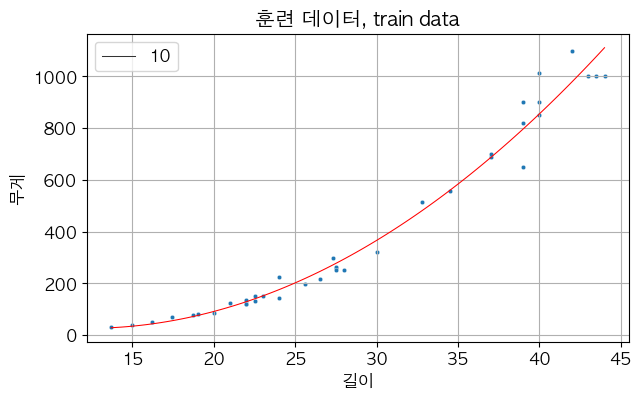

In [95]:
plt.figure(figsize = (7, 4))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], s=10) # s는 marker의 사이즈 설정하는 파라미터
sb.lineplot(x=Vtrand, y=Ttrand, color = 'red', size = 10)
plt.title('훈련 데이터, train data')
plt.grid()
plt.show()
plt.close()

#### 모듈에 구현해 둔 추세선생성 함수 활용

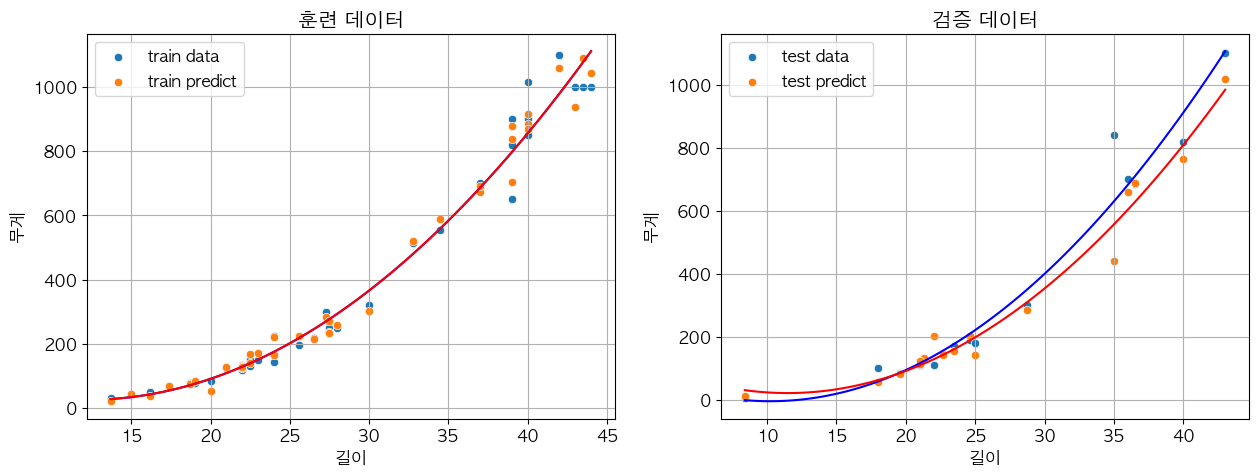

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 관측치 시각화
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)

# 학습에 사용한 데이터에 추세선
x, y = helper.getTrend(x_train['길이'], y_train['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax1)

# 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

# 추정치에 대한 추세선
x, y = helper.getTrend(x_train['길이'], y_train_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

# 검증데이터 시각화
sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)

# 검증데이터의 추세선
x, y = helper.getTrend(x_test['길이'], y_test['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax2)

# 검증데이터에 대한 추정치 시각화
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

# 검증데이터 추정치에 대한 추세선
x, y = helper.getTrend(x_test['길이'], y_test_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

#### 회귀분석 학습결과 그래프 모듈 기능 활용
- 훈련 데이터에 대한 단일 그래프

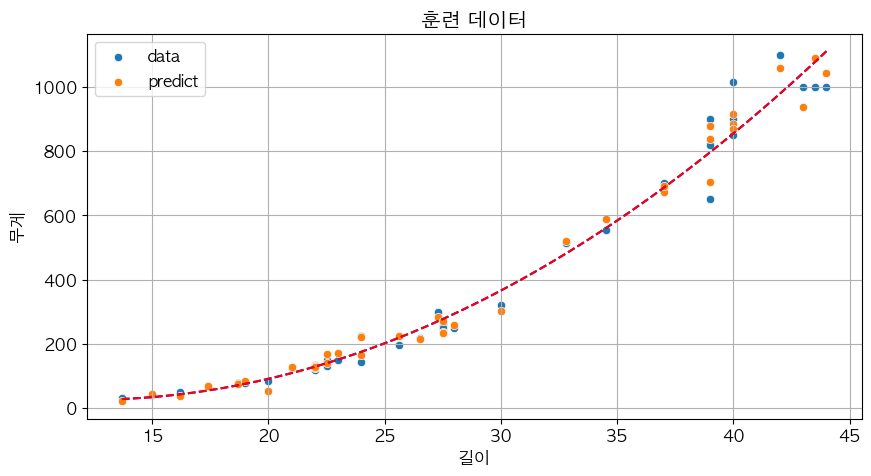

In [96]:
helper.regplot(x_train['길이'],
               y_train['무게'],
               y_train_pred,
               '훈련 데이터',
               figsize = (10, 5))

- 검증 데이터에 대한 단일 그래프

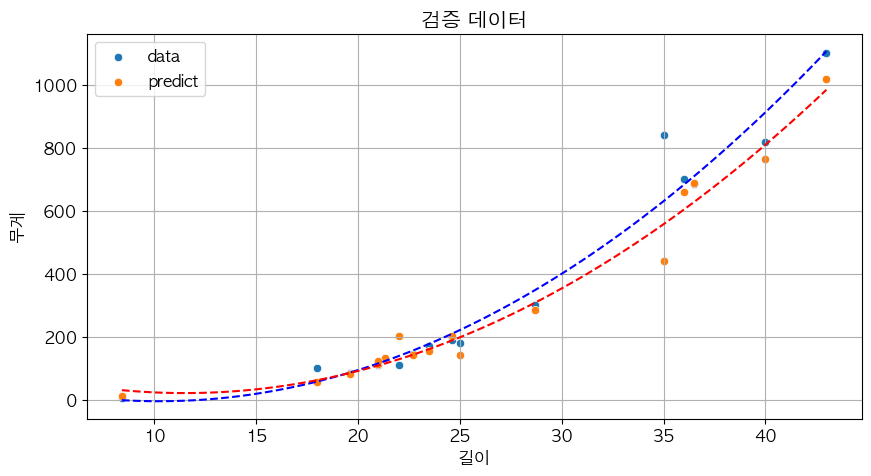

In [97]:
helper.regplot(x_test['길이'],
               y_test['무게'],
               y_test_pred,
               '검증 데이터',
               figsize = (10, 5))

- 훈련, 검증 데이터에 대한 서브 플롯

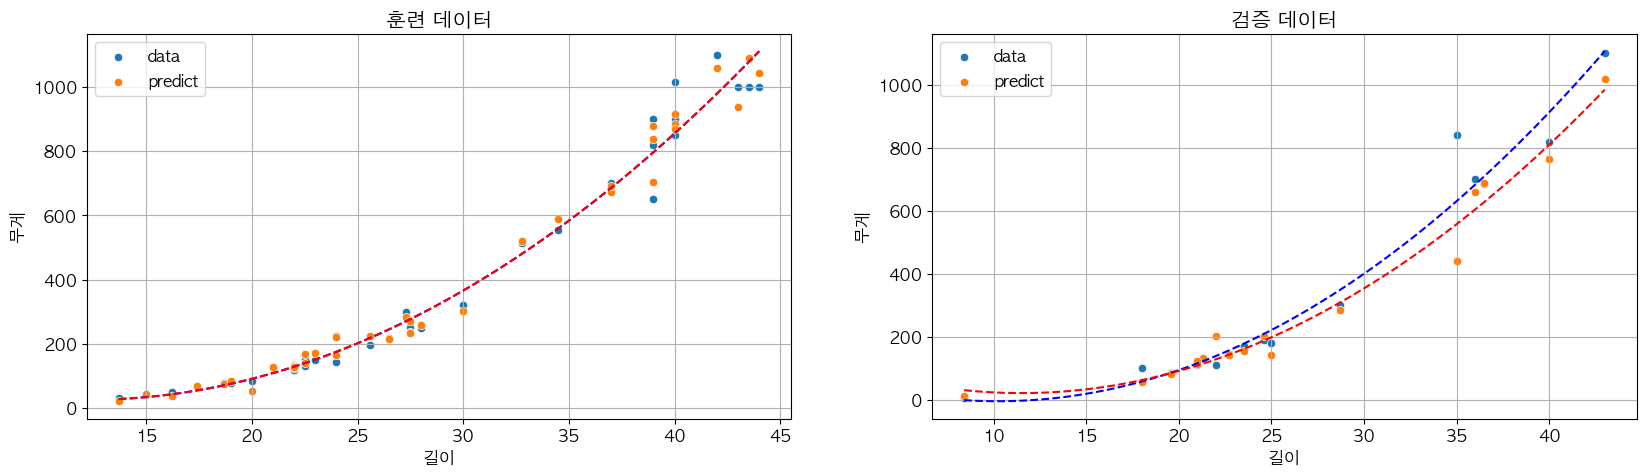

In [98]:
helper.regplot(x_train['길이'], y_train['무게'], y_train_pred, "훈련 데이터", 
               x_test['길이'], y_test['무게'], y_test_pred, "검증 데이터", 
               figsize=(20, 5), save_path="다항회귀.png")